In [683]:
import sys
sys.path.append('D:\Programs\Anaconda3\Lib\site-packages')

import requests
from bs4 import BeautifulSoup as bs
from IPython.core.display import HTML
import pandas as pd4
import numpy as np
#import matplotlib.pyplot as plt # even though we plot we don't need this package?? why not?? (pandas has it built in?)
%matplotlib inline

In [129]:
"""short exercise on functions"""
def f1(x, y=1):
    return x+y

print(f1(1,2))
print(f1(1))
print()

def f2(itemtype, *items):
    print("You have %d %s:" %(len(items), itemtype))
    for item in items:
        print(item)

f2("groceries", "apple", "banana", "chicken nuggets")
print()

def f3(itemtype, **items):
    print("You have %d %s:" %(len(items), itemtype))
    for item in items:
        print(item, ":", items[item])
        
f3("groceries", apple="fruit", banana="fruit", chicken_nuggets="meat")

# note that order is important when combining these ideas:
# e.g. def f4(itemtype, x=1, *itemtype1, **itemtype2):

3
2

You have 3 groceries:
apple
banana
chicken nuggets

You have 3 groceries:
apple : fruit
chicken_nuggets : meat
banana : fruit


In [8]:
req = requests.get("https://en.wikipedia.org/wiki/List_of_NHL_statistical_leaders_by_country")
type(req)
dir(req) # gives list of object properties where req is the object; entries with __ are not usually called directly

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [10]:
req.url
page = req.text

In [18]:
soup = bs(page, 'html.parser')

In [459]:
type(soup) # this is a 'BeautifulSoup opject!
#print(soup.prettify()) # to see the HTML indented

bs4.BeautifulSoup

In [37]:
"""can use dot notation (e.g., soup.___) to access elements as if they were properties of the object"""
soup.title

<title>List of NHL statistical leaders by country - Wikipedia, the free encyclopedia</title>

In [499]:
"""note that title is not a property of soup"""
"title" in dir(soup)

False

In [500]:
"""on the other hand, index is a property of soup apparently"""
#print(soup.index)
"index" in dir(soup)

True

In [130]:
print(soup.p) # printing the first p labeled element
print()
print(len(soup.find_all("p"))) # the number of p labeled elements
print()
print(soup.find_all("p")[0]) # the first one again
print()
print(soup.find_all("p")) # all of them

<p>This is a <b>list of National Hockey League statistical leaders by country of birth</b>, sorted by total points. The top ten players from each country are included. Statistics are current through the end of the <a href="/wiki/2014%E2%80%9315_NHL_season" title="2014–15 NHL season">2014–15 NHL season</a> and players currently playing in the <a href="/wiki/National_Hockey_League" title="National Hockey League">National Hockey League</a> are marked in <b>boldface</b>.</p>

5

<p>This is a <b>list of National Hockey League statistical leaders by country of birth</b>, sorted by total points. The top ten players from each country are included. Statistics are current through the end of the <a href="/wiki/2014%E2%80%9315_NHL_season" title="2014–15 NHL season">2014–15 NHL season</a> and players currently playing in the <a href="/wiki/National_Hockey_League" title="National Hockey League">National Hockey League</a> are marked in <b>boldface</b>.</p>

[<p>This is a <b>list of National Hockey Le

In [70]:
"""it appears the tables I want do not show up with soup.table; only the table of contents at the top"""
soup.table["class"]

['toc']

In [160]:
canadians = soup.find_all("table")[2] # this is the canadian player table I want
print("type:")
print(type(canadians))
print("contents:")
print(canadians)

type:
<class 'bs4.element.Tag'>
contents:
<table cellpadding="3" cellspacing="3" id="Table3" style="font-size:95%;">
<tr style="text-align:center; background:#e0e0e0">
<th style="width:3em;">Rank</th>
<th style="width:13em;">Name</th>
<th style="width:20em;">Team(s)</th>
<th style="width:3.3em;">GP</th>
<th style="width:3.3em;">Pts</th>
<th style="width:3.3em;">PPG</th>
</tr>
<tr>
<th>1</th>
<td><a href="/wiki/Wayne_Gretzky" title="Wayne Gretzky">Wayne Gretzky</a></td>
<td><a href="/wiki/Edmonton_Oilers" title="Edmonton Oilers">EDM</a>, <a href="/wiki/Los_Angeles_Kings" title="Los Angeles Kings">LAK</a>, <a href="/wiki/St._Louis_Blues" title="St. Louis Blues">STL</a>, <a href="/wiki/New_York_Rangers" title="New York Rangers">NYR</a></td>
<td>1,487</td>
<td>2,857</td>
<td>1.92</td>
</tr>
<tr style="background:#f0f0f0;">
<th>2</th>
<td><a href="/wiki/Mark_Messier" title="Mark Messier">Mark Messier</a></td>
<td><a href="/wiki/Edmonton_Oilers" title="Edmonton Oilers">EDM</a>, <a href="/wik

In [74]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

[['toc'],
 ['navbox'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner']]

In [83]:
print(canadians.get("class")) # it seems the tables I want have no class :(

None


In [96]:
canadians_str = str(canadians)
HTML(canadians_str)

Rank,Name,Team(s),GP,Pts,PPG
1,Wayne Gretzky,"EDM, LAK, STL, NYR","1,487","2,857",1.92
2,Mark Messier,"EDM, NYR, VAN, NYR","1,756","1,887",1.07
3,Gordie Howe,"DET, HAR","1,767","1,850",1.05
4,Ron Francis,"HAR, PIT, CAR, TOR","1,731","1,798",1.04
5,Marcel Dionne,"DET, LAK, NYR","1,348","1,771",1.31
6,Steve Yzerman,DET,"1,514","1,755",1.16
7,Mario Lemieux,PIT,915,"1,723",1.88
8,Joe Sakic,"QUE, COL","1,378","1,641",1.19
9,Phil Esposito,"CHI, BOS, NYR","1,282","1,590",1.24
10,Ray Bourque (D),"BOS, COL","1,612","1,579",0.98


In [164]:
rows = [row for row in canadians.find_all("tr")]
headers = rows[0].get_text().splitlines()
headers = headers[1:]
print(headers)
type(rows)
print(rows[1].find_all("td"))

['Rank', 'Name', 'Team(s)', 'GP', 'Pts', 'PPG']
[<td><a href="/wiki/Wayne_Gretzky" title="Wayne Gretzky">Wayne Gretzky</a></td>, <td><a href="/wiki/Edmonton_Oilers" title="Edmonton Oilers">EDM</a>, <a href="/wiki/Los_Angeles_Kings" title="Los Angeles Kings">LAK</a>, <a href="/wiki/St._Louis_Blues" title="St. Louis Blues">STL</a>, <a href="/wiki/New_York_Rangers" title="New York Rangers">NYR</a></td>, <td>1,487</td>, <td>2,857</td>, <td>1.92</td>]


In [149]:
remove_nl = lambda s: s.replace("\n", " ") # a lambda to remove all new line characters and insert spaces
replace_comma = lambda s: s.replace(",","") # this one replaces commas with blank space

In [449]:
items = [value.get_text() for row in rows for value in row.find_all("td")]
print(items)
print()
print([items[i::5] for i in range(1,len(headers)-1)]) # sorting by header
print()

players = items[0::5]
print(players)
print()

ranks = [[i+1 for i in range(0,len(players))]] #re-introducting rank information
print(ranks)
print()

values1 = ranks+[items[i::5] for i in range(1,len(headers)-1)]
for j in range(2,4):
    for i in range(0,len(players)):
        values1[j][i] = int(replace_comma(values1[j][i]))
for i in range(0,len(players)):
    values1[4][i] = float(values1[4][i])
        
stacked_items_nonames = list(zip(*values1)) # type(zip(a))!=list in python3)
print(stacked_items_nonames)
print()

values2 = ranks+[items[i::5] for i in range(0,len(headers)-1)]
for j in range(3,5):
    for i in range(0,len(players)):
        values2[j][i] = int(replace_comma(values2[j][i]))
for i in range(0,len(players)):
    values2[5][i] = float(values2[5][i])
        
stacked_items_names = list(zip(*values2))
print(stacked_items_names)

['Wayne Gretzky', 'EDM, LAK, STL, NYR', '1,487', '2,857', '1.92', 'Mark Messier', 'EDM, NYR, VAN, NYR', '1,756', '1,887', '1.07', 'Gordie Howe', 'DET, HAR', '1,767', '1,850', '1.05', 'Ron Francis', 'HAR, PIT, CAR, TOR', '1,731', '1,798', '1.04', 'Marcel Dionne', 'DET, LAK, NYR', '1,348', '1,771', '1.31', 'Steve Yzerman', 'DET', '1,514', '1,755', '1.16', 'Mario Lemieux', 'PIT', '915', '1,723', '1.88', 'Joe Sakic', 'QUE, COL', '1,378', '1,641', '1.19', 'Phil Esposito', 'CHI, BOS, NYR', '1,282', '1,590', '1.24', 'Ray Bourque (D)', 'BOS, COL', '1,612', '1,579', '0.98']

[['EDM, LAK, STL, NYR', 'EDM, NYR, VAN, NYR', 'DET, HAR', 'HAR, PIT, CAR, TOR', 'DET, LAK, NYR', 'DET', 'PIT', 'QUE, COL', 'CHI, BOS, NYR', 'BOS, COL'], ['1,487', '1,756', '1,767', '1,731', '1,348', '1,514', '915', '1,378', '1,282', '1,612'], ['2,857', '1,887', '1,850', '1,798', '1,771', '1,755', '1,723', '1,641', '1,590', '1,579'], ['1.92', '1.07', '1.05', '1.04', '1.31', '1.16', '1.88', '1.19', '1.24', '0.98']]

['Wayne G

In [210]:
"""another example using the astrix to 'explode' lsits"""
stuffs = ['apples', 'are', 5.49030]
print(*stuffs)

apples are 5.4903


In [273]:
{key: value for key, value in zip(players, stacked_items_nonames)} # making a dictionary with comprehension

{'Gordie Howe': (3, 'DET, HAR', 1767, 1850, 1.05),
 'Joe Sakic': (8, 'QUE, COL', 1378, 1641, 1.19),
 'Marcel Dionne': (5, 'DET, LAK, NYR', 1348, 1771, 1.31),
 'Mario Lemieux': (7, 'PIT', 915, 1723, 1.88),
 'Mark Messier': (2, 'EDM, NYR, VAN, NYR', 1756, 1887, 1.07),
 'Phil Esposito': (9, 'CHI, BOS, NYR', 1282, 1590, 1.24),
 'Ray Bourque (D)': (10, 'BOS, COL', 1612, 1579, 0.98),
 'Ron Francis': (4, 'HAR, PIT, CAR, TOR', 1731, 1798, 1.04),
 'Steve Yzerman': (6, 'DET', 1514, 1755, 1.16),
 'Wayne Gretzky': (1, 'EDM, LAK, STL, NYR', 1487, 2857, 1.92)}

In [280]:
"""making a dataframe a couple different ways"""
data_dict = [{key: val for key, val in zip(headers, row)} for row in stacked_items_names] # a comprehension list of dictionaries
data_dict

[{'GP': 1487,
  'Name': 'Wayne Gretzky',
  'PPG': 1.92,
  'Pts': 2857,
  'Rank': 1,
  'Team(s)': 'EDM, LAK, STL, NYR'},
 {'GP': 1756,
  'Name': 'Mark Messier',
  'PPG': 1.07,
  'Pts': 1887,
  'Rank': 2,
  'Team(s)': 'EDM, NYR, VAN, NYR'},
 {'GP': 1767,
  'Name': 'Gordie Howe',
  'PPG': 1.05,
  'Pts': 1850,
  'Rank': 3,
  'Team(s)': 'DET, HAR'},
 {'GP': 1731,
  'Name': 'Ron Francis',
  'PPG': 1.04,
  'Pts': 1798,
  'Rank': 4,
  'Team(s)': 'HAR, PIT, CAR, TOR'},
 {'GP': 1348,
  'Name': 'Marcel Dionne',
  'PPG': 1.31,
  'Pts': 1771,
  'Rank': 5,
  'Team(s)': 'DET, LAK, NYR'},
 {'GP': 1514,
  'Name': 'Steve Yzerman',
  'PPG': 1.16,
  'Pts': 1755,
  'Rank': 6,
  'Team(s)': 'DET'},
 {'GP': 915,
  'Name': 'Mario Lemieux',
  'PPG': 1.88,
  'Pts': 1723,
  'Rank': 7,
  'Team(s)': 'PIT'},
 {'GP': 1378,
  'Name': 'Joe Sakic',
  'PPG': 1.19,
  'Pts': 1641,
  'Rank': 8,
  'Team(s)': 'QUE, COL'},
 {'GP': 1282,
  'Name': 'Phil Esposito',
  'PPG': 1.24,
  'Pts': 1590,
  'Rank': 9,
  'Team(s)': 'CHI, BO

In [309]:
pd.DataFrame(data_dict, index=ranks) # feed pandas the list of dictionaries
# note that feeding in index=ranks is not necessary

,GP,Name,PPG,Pts,Rank,Team(s)
1,1487,Wayne Gretzky,1.92,2857,1,"EDM, LAK, STL, NYR"
2,1756,Mark Messier,1.07,1887,2,"EDM, NYR, VAN, NYR"
3,1767,Gordie Howe,1.05,1850,3,"DET, HAR"
4,1731,Ron Francis,1.04,1798,4,"HAR, PIT, CAR, TOR"
5,1348,Marcel Dionne,1.31,1771,5,"DET, LAK, NYR"
6,1514,Steve Yzerman,1.16,1755,6,DET
7,915,Mario Lemieux,1.88,1723,7,PIT
8,1378,Joe Sakic,1.19,1641,8,"QUE, COL"
9,1282,Phil Esposito,1.24,1590,9,"CHI, BOS, NYR"
10,1612,Ray Bourque (D),0.98,1579,10,"BOS, COL"


In [451]:
df = pd.DataFrame(stacked_items_names, columns=headers, index=ranks) # feeding pandas a few lists
df

,Rank,Name,Team(s),GP,Pts,PPG
1,1,Wayne Gretzky,"EDM, LAK, STL, NYR",1487,2857,1.92
2,2,Mark Messier,"EDM, NYR, VAN, NYR",1756,1887,1.07
3,3,Gordie Howe,"DET, HAR",1767,1850,1.05
4,4,Ron Francis,"HAR, PIT, CAR, TOR",1731,1798,1.04
5,5,Marcel Dionne,"DET, LAK, NYR",1348,1771,1.31
6,6,Steve Yzerman,DET,1514,1755,1.16
7,7,Mario Lemieux,PIT,915,1723,1.88
8,8,Joe Sakic,"QUE, COL",1378,1641,1.19
9,9,Phil Esposito,"CHI, BOS, NYR",1282,1590,1.24
10,10,Ray Bourque (D),"BOS, COL",1612,1579,0.98


In [311]:
df.dtypes
#df.dropna() # drop rows with missing values (does nothing becuase we have no missing values)
#df.dropna(axis=1) # drop columns "..."
#df.fillna(__).astype(int) # fills NaN with integer type number __

Rank         int64
Name        object
Team(s)     object
GP           int64
Pts          int64
PPG        float64
dtype: object

In [312]:
df.describe()

,Rank,GP,Pts,PPG
count,10.00000,10.000000,10.00000,10.000000
mean,5.50000,1479.000000,1845.10000,1.284000
std,3.02765,263.822752,370.28501,0.339778
min,1.00000,915.000000,1579.00000,0.980000
25%,3.25000,1355.500000,1661.50000,1.055000
50%,5.50000,1500.500000,1763.00000,1.175000
75%,7.75000,1701.250000,1837.00000,1.292500
max,10.00000,1767.000000,2857.00000,1.920000


In [313]:
df.values

array([[1, 'Wayne Gretzky', 'EDM, LAK, STL, NYR', 1487, 2857, 1.92],
       [2, 'Mark Messier', 'EDM, NYR, VAN, NYR', 1756, 1887, 1.07],
       [3, 'Gordie Howe', 'DET, HAR', 1767, 1850, 1.05],
       [4, 'Ron Francis', 'HAR, PIT, CAR, TOR', 1731, 1798, 1.04],
       [5, 'Marcel Dionne', 'DET, LAK, NYR', 1348, 1771, 1.31],
       [6, 'Steve Yzerman', 'DET', 1514, 1755, 1.16],
       [7, 'Mario Lemieux', 'PIT', 915, 1723, 1.88],
       [8, 'Joe Sakic', 'QUE, COL', 1378, 1641, 1.19],
       [9, 'Phil Esposito', 'CHI, BOS, NYR', 1282, 1590, 1.24],
       [10, 'Ray Bourque (D)', 'BOS, COL', 1612, 1579, 0.98]], dtype=object)

In [314]:
type(df.values) # this is a NumPy type (i.e., pandas is built on numpy)

numpy.ndarray

In [315]:
print(df.Pts)
print("mean=",np.mean(df.Pts))
print()
print(np.std(df)) # standard deviation!

0    2857
1    1887
2    1850
3    1798
4    1771
5    1755
6    1723
7    1641
8    1590
9    1579
Name: Pts, dtype: int64
mean= 1845.1

Rank      2.872281
GP      250.284238
Pts     351.283205
PPG       0.322341
dtype: float64


In [316]:
df["GP"] # this 'dictionary syntax' is equivalent to df.GP

0    1487
1    1756
2    1767
3    1731
4    1348
5    1514
6     915
7    1378
8    1282
9    1612
Name: GP, dtype: int64

In [320]:
df.Name[0]

'Wayne Gretzky'

In [331]:
df.loc[1] # output would be same as seen below usin iloc
df.iloc[0] # note that df.ix[__] is a hybrid of .loc and .iloc

Rank                        1
Name            Wayne Gretzky
Team(s)    EDM, LAK, STL, NYR
GP                       1487
Pts                      2857
PPG                      1.92
Name: 1, dtype: object

In [452]:
allplayers = len(players)+1
players = []
for i in range(1,allplayers):
    name = df.loc[i,"Name"]
    if name[-3:] == "(D)": # if true, fix the string
        df.loc[i,"Name"] = name[:-4]
        print(df.loc[i,"Name"])
    players.append(df.loc[i,"Name"])
print(players)

Ray Bourque
['Wayne Gretzky', 'Mark Messier', 'Gordie Howe', 'Ron Francis', 'Marcel Dionne', 'Steve Yzerman', 'Mario Lemieux', 'Joe Sakic', 'Phil Esposito', 'Ray Bourque']


In [453]:
def get_ppg(row):
    print(df.loc[row,"Name"],"has an average of",df.loc[row,"PPG"],"points per game.")

i=1
for player in players:
    get_ppg(i)
    i += 1

Wayne Gretzky has an average of 1.92 points per game.
Mark Messier has an average of 1.07 points per game.
Gordie Howe has an average of 1.05 points per game.
Ron Francis has an average of 1.04 points per game.
Marcel Dionne has an average of 1.31 points per game.
Steve Yzerman has an average of 1.16 points per game.
Mario Lemieux has an average of 1.88 points per game.
Joe Sakic has an average of 1.19 points per game.
Phil Esposito has an average of 1.24 points per game.
Ray Bourque has an average of 0.98 points per game.


                        Name             Team(s)  Games played  Points
Wayne Gretzky  Wayne Gretzky  EDM, LAK, STL, NYR          1487    2857
Mark Messier    Mark Messier  EDM, NYR, VAN, NYR          1756    1887
Gordie Howe      Gordie Howe            DET, HAR          1767    1850
Ron Francis      Ron Francis  HAR, PIT, CAR, TOR          1731    1798
Marcel Dionne  Marcel Dionne       DET, LAK, NYR          1348    1771
Steve Yzerman  Steve Yzerman                 DET          1514    1755
Mario Lemieux  Mario Lemieux                 PIT           915    1723
Joe Sakic          Joe Sakic            QUE, COL          1378    1641
Phil Esposito  Phil Esposito       CHI, BOS, NYR          1282    1590
Ray Bourque      Ray Bourque            BOS, COL          1612    1579


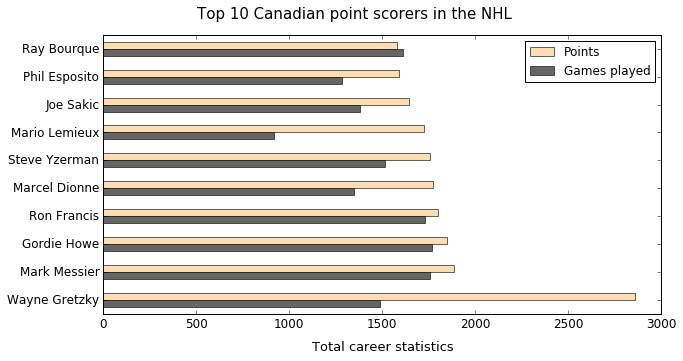

In [746]:
"""change the format of our dataframe to be more conducive to plotting"""
dfplot1 = df.drop(["PPG","Rank"], axis=1)
dfplot1 = dfplot1.rename(columns={'GP':'Games played','Pts':'Points'})
dfplot1.index = players
print(dfplot1)

bar1 = dfplot1.plot(kind="barh", figsize=(10,5), colormap=("copper"), alpha=0.6, fontsize=12)
plt.xlabel("Total career statistics", fontsize=13, labelpad=10)
plt.title("Top 10 Canadian point scorers in the NHL", fontsize=15, y=1.04, x=0.45)

handles, labels = bar1.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1]) # swap the legend ordering from the default for consistency

In [720]:
top_number = 32
country_names = [soup.find_all("h3")[i].get_text()[:-6] for i in range(0, top_number)]
print(country_names, "\n")
country_tables = [soup.find_all("table")[i] for i in range(2, 2+top_number)]

"""now let's get the top player from each country"""
names = [country_tables[i].find_all("td")[0].get_text() for i in range(len(country_tables))]
still_active = ['Jaromir Jagr', 'Anze Kopitar', 'Thomas Vanek', 'Frans Nielsen', 'Mats Zuccarello', 'Leo Komarov']
i = 0
for name in names: # fix the names
    if "(D)" in name:
        names[i] = name[:-4]
        #print("fixed",name)
    if "[" in name:
        names[i] = name[:name.index("[")]
        #print("fixed",name)
    if names[i] in still_active:
        names[i] = names[i]+"*"
    i += 1
print(names, "\n")

GP = [int(replace_comma(country_tables[i].find_all("td")[2].get_text())) for i in range(len(country_tables))]
print(GP, "\n")

Pts = [int(replace_comma(country_tables[i].find_all("td")[3].get_text())) for i in range(len(country_tables))]
print(Pts, "\n")

['Canada', 'Czech Republic', 'Slovakia', 'Finland', 'United States', 'Sweden', 'Russia', 'United Kingdom', 'Ukraine', 'Serbia', 'Germany', 'France', 'Slovenia', 'Austria', 'Lithuania', 'Latvia', 'Kazakhstan', 'Paraguay', 'Poland', 'Switzerland', 'Republic of China (Taiwan)', 'Denmark', 'South Korea', 'Belarus', 'Netherlands', 'Brazil', 'Brunei', 'Norway', 'Venezuela', 'Italy', 'Haiti', 'Estonia'] 

['Wayne Gretzky', 'Jaromir Jagr*', 'Stan Mikita', 'Teemu Selanne', 'Mike Modano', 'Mats Sundin', 'Sergei Fedorov', 'Steve Thomas', 'Peter Bondra', 'Ivan Boldirev', 'Dany Heatley', 'Paul MacLean', 'Anze Kopitar*', 'Thomas Vanek*', 'Dainius Zubrus', 'Sandis Ozolinsh', 'Nik Antropov', 'Willi Plett', 'Mariusz Czerkawski', 'Mark Streit', 'Rod Langway', 'Frans Nielsen*', 'Richard Park', 'Andrei Kostitsyn', 'Ed Beers', 'Robyn Regehr', 'Craig Adams', 'Mats Zuccarello*', 'Rick Chartraw', 'Luca Sbisa', 'Claude Vilgrain', 'Leo Komarov*'] 

[1487, 1550, 1394, 1451, 1499, 1346, 1248, 1235, 1081, 1052, 86

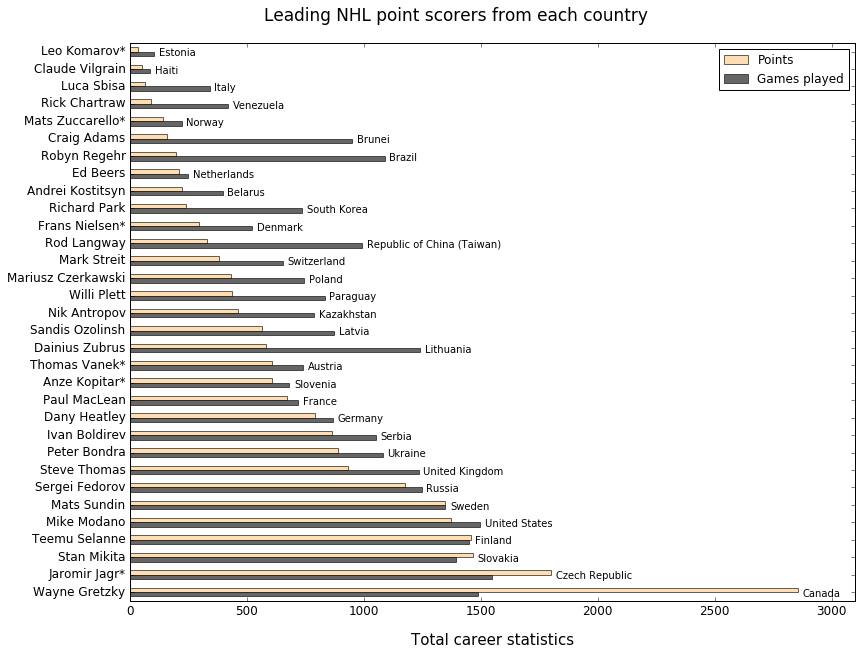

In [745]:
#i = 0
#df2_index = []
#for i in range(0,len(names)):
#    df2_index.append('{0:<15}{1:>15}'.format(country_names[i],names[i]))
#    print(df2_index[i])
#    i += 1

all_stacked_items = list(zip(GP, Pts, country_names))
#print(all_stacked_items, "\n")
df2 = pd.DataFrame(all_stacked_items, index=names, columns=["Games played", "Points", "Country"])
#df2 = df2.drop(["Dany Heatley", "Rod Langway", "Ed Beers"]) # these players were raised in North America
#print(df2)

bar2 = df2.plot(kind="barh", figsize=(13,10), colormap=("copper"), alpha=0.6, fontsize=12)
plt.xlabel("Total career statistics", fontsize=15, labelpad=15)
plt.title("Leading NHL point scorers from each country", fontsize=17, y=1.03, x=0.45)
plt.xlim(0,3100)

rects = bar2.patches
half_recs = int(len(rects)/2)
rec1 = [rects[i] for i in range(half_recs)]
rec2 = [rects[i] for i in range(half_recs,half_recs*2)]
i = 0
for country in country_names:
    x_position = max(rec1[i].get_width(), rec2[i].get_width())
    x_space = 20 # hard-coded extra spacing
    bar2.text(x_position+x_space, rec1[i].get_y()-rec1[i].get_height()/2 , country, ha='left',  va='bottom')
    i += 1
    

handles, labels = bar2.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1]) # swap the legend ordering from the default for consistency

Plotting country index # 3 : Czech Republic
Plotting country index # 5 : Finland
Plotting country index # 6 : United States
Plotting country index # 7 : Sweden
Plotting country index # 8 : Russia


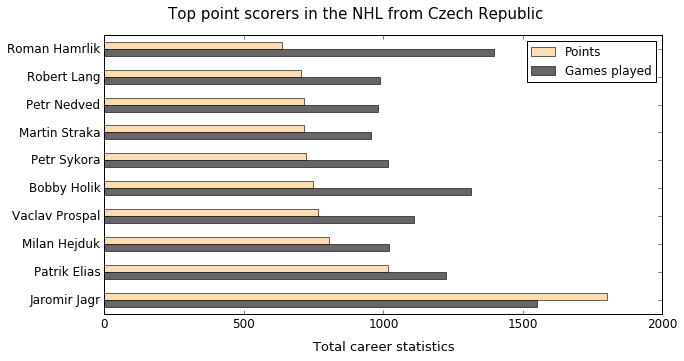

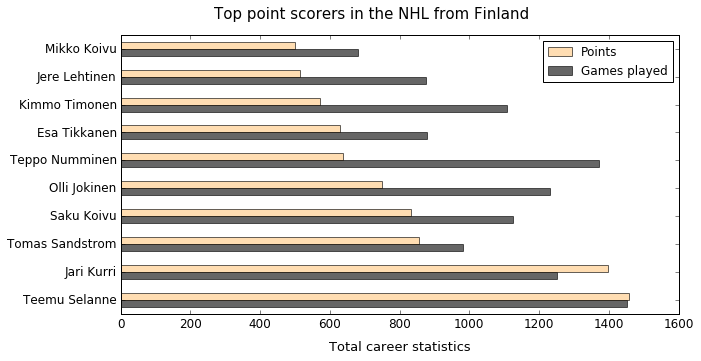

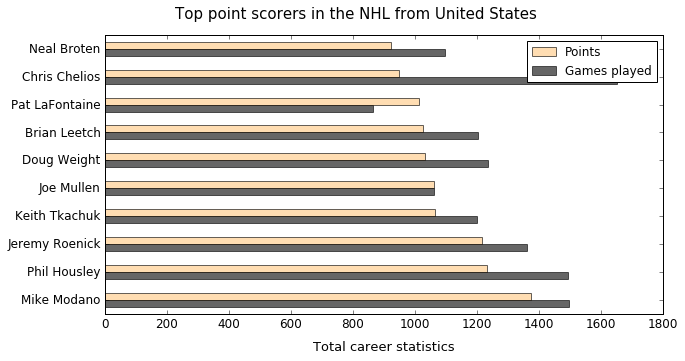

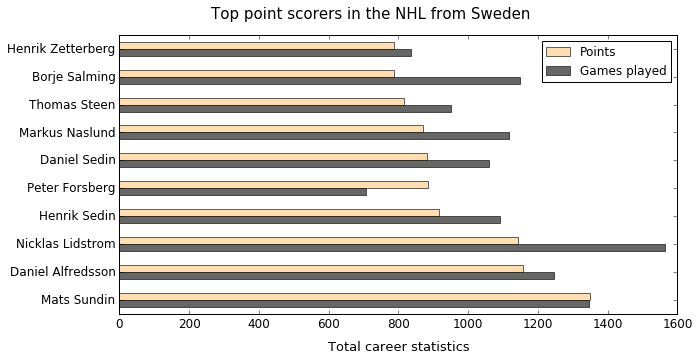

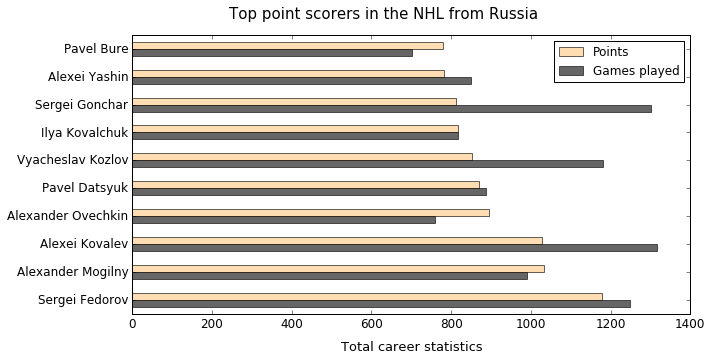

In [782]:
"""create a function that can be used to plot any team"""
def NHLtop10(country):
    
    replace_comma = lambda s: s.replace(",","")
    
    country_index = country_names.index(country)+2 # add two in oder to skip the other tables
    print("Plotting country index #", country_index, ":", country)
    
    table = soup.find_all("table")[country_index]
    rows = [row for row in table.find_all("tr")]
    headers = rows[0].get_text().splitlines()
    headers = headers[1:]
    
    items = [value.get_text() for row in rows for value in row.find_all("td")]
    players = items[0::5]
    ranks = [[i+1 for i in range(0,len(players))]]
    
    values = ranks+[items[i::5] for i in range(0,len(headers)-1)]
    for j in range(3,5):
        for i in range(0,len(players)):
            values[j][i] = int(replace_comma(values[j][i]))
    for i in range(0,len(players)):
        values[5][i] = float(values[5][i])
    stacked_items_names = list(zip(*values))
    
    i = 0
    for name in players: # fix the names
        if "(D)" in name:
            players[i] = name[:-4]
        if "[" in name:
            players[i] = name[:name.index("[")]
#        if names[i] in still_active:
#            names[i] = names[i]+"*"
        i += 1
    
    df = pd.DataFrame(stacked_items_names, columns=headers, index=ranks)

    """change the format of our dataframe to be more conducive to plotting"""
    dfplot1 = df.drop(["PPG","Rank"], axis=1)
    dfplot1 = dfplot1.rename(columns={'GP':'Games played','Pts':'Points'})
    dfplot1.index = players

    bar1 = dfplot1.plot(kind="barh", figsize=(10,5), colormap=("copper"), alpha=0.6, fontsize=12)
    plt.xlabel("Total career statistics", fontsize=13, labelpad=10)
    plt.title("Top point scorers in the NHL from {}".format(country), fontsize=15, y=1.04, x=0.45)

    handles, labels = bar1.get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1]) # swap the legend ordering from the default for consistency
    
NHLtop10("Czech Republic")
NHLtop10("Finland")
NHLtop10("United States")
NHLtop10("Sweden")
NHLtop10("Russia")

In [767]:
country_names

['Canada',
 'Czech Republic',
 'Slovakia',
 'Finland',
 'United States',
 'Sweden',
 'Russia',
 'United Kingdom',
 'Ukraine',
 'Serbia',
 'Germany',
 'France',
 'Slovenia',
 'Austria',
 'Lithuania',
 'Latvia',
 'Kazakhstan',
 'Paraguay',
 'Poland',
 'Switzerland',
 'Republic of China (Taiwan)',
 'Denmark',
 'South Korea',
 'Belarus',
 'Netherlands',
 'Brazil',
 'Brunei',
 'Norway',
 'Venezuela',
 'Italy',
 'Haiti',
 'Estonia']